In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [4]:
df.shape

(119390, 32)

In [5]:
df_sample = df.sample(frac=0.2)

In [6]:
df_rest = df.drop(df_sample.index)

In [7]:
df_sample.shape

(23878, 32)

In [8]:
df_rest.shape

(95512, 32)

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


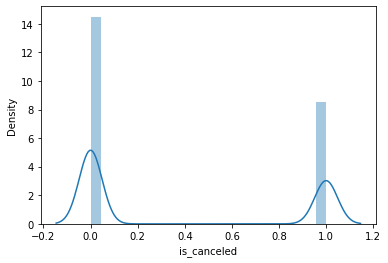

In [9]:
sns.distplot(df_rest['is_canceled'])
plt.show()

In [10]:
df_rest.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Dealing with missing value

In [11]:
df_rest.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              2
babies                                0
meal                                  0
country                             392
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13104
company                           90061


In [12]:
df_rest.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [13]:
df_rest.isnull().sum()/df_rest.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.002094
babies                             0.000000
meal                               0.000000
country                            0.410420
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [14]:
df_rest['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119384   NaN
119385   NaN
119386   NaN
119388   NaN
119389   NaN
Name: company, Length: 95512, dtype: float64

In [15]:
df_rest.drop(['company'], axis=1, inplace=True)

In [16]:
df_rest.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
df_rest['agent']

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119384    394.0
119385    394.0
119386      9.0
119388     89.0
119389      9.0
Name: agent, Length: 95512, dtype: float64

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


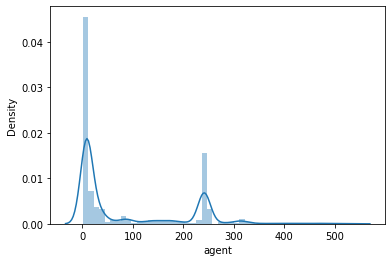

In [18]:
sns.distplot(df_rest['agent'])
plt.show()

<b> Column 'agent' consists of IDs of Travel agencies. Travel agencies' IDs are independent numbers. Since 13.68% of the 'agent' data are missing, we can drop this column as well.</b> 

In [19]:
df_rest.drop(['agent'],axis=1,inplace=True)

In [20]:
df_rest['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119384    BEL
119385    BEL
119386    FRA
119388    GBR
119389    DEU
Name: country, Length: 95512, dtype: object

In [21]:
df_rest['country'].unique()

array(['PRT', 'GBR', 'USA', 'IRL', nan, 'ESP', 'ROU', 'NOR', 'OMN', 'ARG',
       'POL', 'FRA', 'BEL', 'DEU', 'CHE', 'GRC', 'ITA', 'NLD', 'DNK',
       'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'CN', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'CHN', 'MAR', 'UKR', 'SMR', 'PRI', 'SRB',
       'IND', 'LVA', 'BLR', 'TUR', 'MEX', 'ZAF', 'ISR', 'LTU', 'CYM',
       'AUT', 'CPV', 'ZWE', 'DZA', 'KOR', 'CRI', 'ARE', 'TUN', 'JAM',
       'ALB', 'HRV', 'HKG', 'IRN', 'GEO', 'GIB', 'URY', 'CAF', 'CYP',
       'JEY', 'COL', 'GGY', 'KWT', 'NGA', 'CHL', 'MDV', 'VEN', 'HUN',
       'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN', 'PHL', 'SEN', 'SYC',
       'AGO', 'AND', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MYS', 'ARM',
       'JPN', 'CMR', 'BIH', 'MUS', 'COM', 'SUR', 'UGA', 'CUB', 'BGR',
       'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU', 'VNM', 'PLW', 'QAT',
       'EGY', 'PER', 'MLT', 'MWI', 'MDG', 'ISL', 'UZB', 'BHS', 'TGO',
       'TWN', 'STP', 'KNA', 'LKA', 'ETH', 'ECU', 'IRQ', 'HND', 'RWA',
       'ZMB', 'K

In [22]:
df_rest['country'].fillna("NC",inplace=True)

In [23]:
df_rest.isnull().sum()/df_rest.shape[0]*100

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.002094
babies                            0.000000
meal                              0.000000
country                           0.000000
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_wai

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


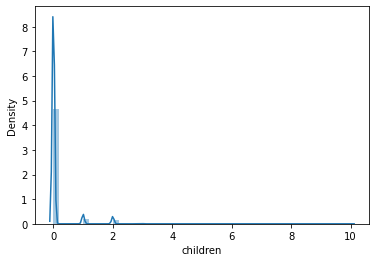

In [24]:
sns.distplot(df_rest['children'])
plt.show()

In [25]:
df_rest['children'].fillna(df_rest['children'].median(), inplace=True)

In [26]:
df_rest.isnull().sum()/df_rest.shape[0]*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [27]:
index_names = df_rest[(df_rest['children']==0.0) & (df_rest['adults']==0.0) & (df_rest['babies']==0.0)].index

In [28]:
index_names

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  32029,
             32827,  34849,
            ...
            111980, 112471, 112558, 114583, 114908, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=153)

In [29]:
df_rest.drop(index_names)

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119384    City Hotel            0         21               2017   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119384             August                        35   
119385             August                        35   
119386             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119384                         30                        2   
119385                         30                        2   
119386                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   C   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119384                     5       2  ...                   A   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list customer_type  \
0                     3   No Deposit                    0     Transient   
1                     4   No Deposit                    0     Transient   
2                     0   No Deposit                    0     Transient   
3                     0   No Deposit                    0     Transient   
4                     0   No Deposit                    0     Transient   
...                 ...          ...                  ...           ...   
119384                0   No Deposit                    0     Transient   
119385                0   No Deposit                    0     Transient   
119386                0   No Deposit                    0     Transient   
119388                0   No Deposit                    0     Transient   
119389                0   No Deposit                    0     Transient   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0     

In [30]:
df_rest.describe()

is_canceled     lead_time  arrival_date_year  \
count  95512.000000  95512.000000       95512.000000   
mean       0.369891    103.876131        2016.157551   
std        0.482777    106.779471           0.707400   
min        0.000000      0.000000        2015.000000   
25%        0.000000     18.000000        2016.000000   
50%        0.000000     69.000000        2016.000000   
75%        1.000000    160.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              95512.000000               95512.000000   
mean                  27.167497                  15.785535   
std                   13.600153                   8.773020   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             95512.000000          95512.000000  95512.000000   
mean                  0.926334              2.502335      1.856050   
std                   0.999124              1.909660      0.594424   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              3.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  95512.000000  95512.000000       95512.000000            95512.000000   
mean       0.102971      0.007926           0.032006                0.087057   
std        0.397512      0.094171           0.176018                0.853788   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000      9.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count                    95512.000000     95512.000000          95512.000000   
mean                         0.139176         0.220925              2.288226   
std                          1.498594         0.649112             17.361736   
min                          0.000000         0.000000              0.000000   
25%                          0.000000         0.000000              0.000000   
50%                          0.000000         0.000000              0.000000   
75%                          0.000000         0.000000              0.000000   
max                         72.000000        21.000000            391.000000   

                adr  required_car_parking_spaces  total_of_special_requests  
count  95512.000000                 95512.000000               95512.000000  
mean     101.864979                     0.062233                   0.570965  
std       51.096229                     0.244080                   0.791672  
min       -6.380000                     0.000000                   0.000000  
25%       69.290000                     0.000000                   0.000000  
50%       94.895000                     0.000000                   0.000000  
75%      126.000000                     0.000000                   1.000000  
max     5400.000000                     8.000000                   5.000000

In [31]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [32]:
basemap = folium.Map()

In [33]:
country_wise_data=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']
country_wise_data

country  No of guests
0       PRT         21071
1       GBR          9676
2       FRA          8481
3       ESP          6391
4       DEU          6069
..      ...           ...
160     GUY             1
161     DJI             1
162     AIA             1
163     SLE             1
164     PYF             1

[165 rows x 2 columns]

In [34]:
country_wise_data.dtypes

country         object
No of guests     int64
dtype: object

In [35]:
# show on map
map_guest = px.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], 
                    hover_name=country_wise_data['country'], 
                    title="Home country of guests")
map_guest.show()

In [36]:
df_rest.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [37]:
#df_rest['total stays'] = df_rest['stays_in_week_nights'] + df_rest['stays_in_weekend_nights']

In [38]:
df_rest.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [39]:
columns = list(df_rest.columns)

In [40]:
#df = df[columns]

In [41]:
#df.iloc[:,7:10]

In [42]:
#from matplotlib.font_manager import FontProperties

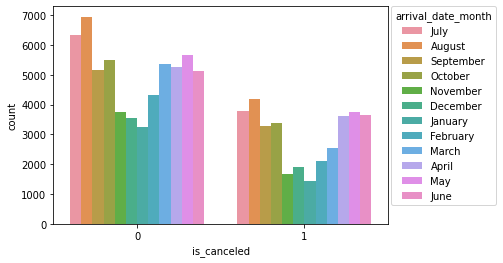

In [43]:
sns.countplot(x='is_canceled', data=df_rest, hue='arrival_date_month')
plt.legend(bbox_to_anchor=(1.01, 1),title='arrival_date_month',borderaxespad=0)
plt.show()

In [44]:
df_rest.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [45]:
#df['reservation_status'].unique()

In [46]:
df_rest['reservation_status_date']=pd.to_datetime(df_rest['reservation_status_date'])

In [47]:
#df.dtypes

In [48]:
df_rest['reservation_status_day'] = df_rest['reservation_status_date'].dt.day
df_rest['reservation_status_month'] = df_rest['reservation_status_date'].dt.month
df_rest['reservation_status_year'] = df_rest['reservation_status_date'].dt.year

In [49]:
df_rest.drop(['reservation_status_date'],axis=1, inplace=True)

In [50]:
df_rest.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [51]:
#df.drop(['total stays'],axis=1, inplace=True)

In [52]:
df_rest_cat = df_rest.select_dtypes(include=['object'])

In [53]:
cat_cols = list(df_rest_cat.columns)

In [54]:
df_rest_cat.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status  
0     Transient          Check-Out  
1     Transient          Check-Out  
2     Transient          Check-Out  
3     Transient          Check-Out  
4     Transient          Check-Out

In [55]:
df_rest_cat['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [56]:
#stop here

In [57]:
df_rest.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [58]:
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [59]:
cat_cols.append('reservation_status_day')


In [60]:
cat_cols.append('reservation_status_month')

In [61]:
cat_cols.append('reservation_status_year')

In [62]:
df_rest['reservation_status_day'].astype('str')

0         1
1         1
2         2
3         2
4         3
         ..
119384    6
119385    6
119386    7
119388    7
119389    7
Name: reservation_status_day, Length: 95512, dtype: object

In [63]:
df_rest['reservation_status_month'].astype('str')

0         7
1         7
2         7
3         7
4         7
         ..
119384    9
119385    9
119386    9
119388    9
119389    9
Name: reservation_status_month, Length: 95512, dtype: object

In [64]:
df_rest['reservation_status_day'].astype('str')

0         1
1         1
2         2
3         2
4         3
         ..
119384    6
119385    6
119386    7
119388    7
119389    7
Name: reservation_status_day, Length: 95512, dtype: object

# Target encoding of Categorical Variables

In [65]:
for col in cat_cols:
    print(df_rest.groupby([col])['is_canceled'].mean().to_dict())
    print('\n')

{'City Hotel': 0.4169529452551294, 'Resort Hotel': 0.27672053409870845}


{'April': 0.40839522844924603, 'August': 0.3754496402877698, 'December': 0.3500551267916207, 'February': 0.327930174563591, 'January': 0.30715347060072173, 'July': 0.3741220694430705, 'June': 0.4163339796965895, 'March': 0.32161887845724435, 'May': 0.3987717069038543, 'November': 0.31039558417663293, 'October': 0.3800247719851368, 'September': 0.3888822900582017}


{'BB': 0.3735493492407809, 'FB': 0.6075949367088608, 'HB': 0.34113279226385773, 'SC': 0.3725467425386134, 'Undefined': 0.2513484358144552}


{'ABW': 0.0, 'AGO': 0.573943661971831, 'ALB': 0.18181818181818182, 'AND': 0.6666666666666666, 'ARE': 0.851063829787234, 'ARG': 0.25882352941176473, 'ARM': 0.2857142857142857, 'ASM': 0.0, 'ATA': 0.0, 'AUS': 0.26099706744868034, 'AUT': 0.17956349206349206, 'AZE': 0.6666666666666666, 'BDI': 0.0, 'BEL': 0.20073375262054508, 'BEN': 1.0, 'BFA': 0.0, 'BGD': 0.6666666666666666, 'BGR': 0.14754098360655737, 'BHR': 1.0, 'BHS

In [66]:
for col in cat_cols:
    dict=df_rest.groupby([col])['is_canceled'].mean().to_dict()
    df_rest[col]=df_rest[col].map(dict)

In [67]:
df_rest.iloc[:,1:10]

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0                 0        342               2015            0.374122   
1                 0        737               2015            0.374122   
2                 0          7               2015            0.374122   
3                 0         13               2015            0.374122   
4                 0         14               2015            0.374122   
...             ...        ...                ...                 ...   
119384            0         21               2017            0.375450   
119385            0         23               2017            0.375450   
119386            0        102               2017            0.375450   
119388            0        109               2017            0.375450   
119389            0        205               2017            0.375450   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119384                        35                         30   
119385                        35                         30   
119386                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  
0                             0                     0       2  
1                             0                     0       2  
2                             0                     1       1  
3                             0                     1       1  
4                             0                     2       2  
...                         ...                   ...     ...  
119384                        2                     5       2  
119385                        2                     5       2  
119386                        2                     5       3  
119388                        2                     5       2  
119389                        2                     7       2  

[95512 rows x 9 columns]

In [68]:
df_rest.iloc[:,10:20]

children  babies      meal   country  market_segment  \
0            0.0       0  0.373549  0.565258        0.152825   
1            0.0       0  0.373549  0.565258        0.152825   
2            0.0       0  0.373549  0.203435        0.152825   
3            0.0       0  0.373549  0.203435        0.186894   
4            0.0       0  0.373549  0.203435        0.367884   
...          ...     ...       ...       ...             ...   
119384       0.0       0  0.373549  0.200734        0.341260   
119385       0.0       0  0.373549  0.200734        0.341260   
119386       0.0       0  0.373549  0.188755        0.367884   
119388       0.0       0  0.373549  0.203435        0.367884   
119389       0.0       0  0.341133  0.165289        0.367884   

        distribution_channel  is_repeated_guest  previous_cancellations  \
0                   0.174454                  0                       0   
1                   0.174454                  0                       0   
2                   0.174454                  0                       0   
3                   0.223448                  0                       0   
4                   0.409518                  0                       0   
...                      ...                ...                     ...   
119384              0.409518                  0                       0   
119385              0.409518                  0                       0   
119386              0.409518                  0                       0   
119388              0.409518                  0                       0   
119389              0.409518                  0                       0   

        previous_bookings_not_canceled  reserved_room_type  
0                                    0            0.328021  
1                                    0            0.328021  
2                                    0            0.390024  
3                                    0            0.390024  
4                                    0            0.390024  
...                                ...                 ...  
119384                               0            0.390024  
119385                               0            0.390024  
119386                               0            0.295407  
119388                               0            0.390024  
119389                               0            0.390024  

[95512 rows x 10 columns]

In [69]:
df_rest.iloc[:,20:31]

assigned_room_type  booking_changes  deposit_type  \
0                 0.188709                3      0.283596   
1                 0.188709                4      0.283596   
2                 0.188709                0      0.283596   
3                 0.443774                0      0.283596   
4                 0.443774                0      0.283596   
...                    ...              ...           ...   
119384            0.443774                0      0.283596   
119385            0.443774                0      0.283596   
119386            0.254237                0      0.283596   
119388            0.443774                0      0.283596   
119389            0.443774                0      0.283596   

        days_in_waiting_list  customer_type     adr  \
0                          0       0.408215    0.00   
1                          0       0.408215    0.00   
2                          0       0.408215   75.00   
3                          0       0.408215   75.00   
4                          0       0.408215   98.00   
...                      ...            ...     ...   
119384                     0       0.408215   96.14   
119385                     0       0.408215   96.14   
119386                     0       0.408215  225.43   
119388                     0       0.408215  104.40   
119389                     0       0.408215  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          1   
...                             ...                        ...   
119384                            0                          2   
119385                            0                          0   
119386                            0                          2   
119388                            0                          0   
119389                            0                          2   

        reservation_status  reservation_status_day  reservation_status_month  
0                        0                0.440581                  0.359752  
1                        0                0.440581                  0.359752  
2                        0                0.442731                  0.359752  
3                        0                0.442731                  0.359752  
4                        0                0.354333                  0.359752  
...                    ...                     ...                       ...  
119384                   0                0.482651                  0.282384  
119385                   0                0.482651                  0.282384  
119386                   0                0.392640                  0.282384  
119388                   0                0.392640                  0.282384  
119389                   0                0.392640                  0.282384  

[95512 rows x 11 columns]

In [70]:
df_rest.iloc[:,21:32]

booking_changes  deposit_type  days_in_waiting_list  customer_type  \
0                     3      0.283596                     0       0.408215   
1                     4      0.283596                     0       0.408215   
2                     0      0.283596                     0       0.408215   
3                     0      0.283596                     0       0.408215   
4                     0      0.283596                     0       0.408215   
...                 ...           ...                   ...            ...   
119384                0      0.283596                     0       0.408215   
119385                0      0.283596                     0       0.408215   
119386                0      0.283596                     0       0.408215   
119388                0      0.283596                     0       0.408215   
119389                0      0.283596                     0       0.408215   

           adr  required_car_parking_spaces  total_of_special_requests  \
0         0.00                            0                          0   
1         0.00                            0                          0   
2        75.00                            0                          0   
3        75.00                            0                          0   
4        98.00                            0                          1   
...        ...                          ...                        ...   
119384   96.14                            0                          2   
119385   96.14                            0                          0   
119386  225.43                            0                          2   
119388  104.40                            0                          0   
119389  151.20                            0                          2   

        reservation_status  reservation_status_day  reservation_status_month  \
0                        0                0.440581                  0.359752   
1                        0                0.440581                  0.359752   
2                        0                0.442731                  0.359752   
3                        0                0.442731                  0.359752   
4                        0                0.354333                  0.359752   
...                    ...                     ...                       ...   
119384                   0                0.482651                  0.282384   
119385                   0                0.482651                  0.282384   
119386                   0                0.392640                  0.282384   
119388                   0                0.392640                  0.282384   
119389                   0                0.392640                  0.282384   

        reservation_status_year  
0                      0.457803  
1                      0.457803  
2                      0.457803  
3                      0.457803  
4                      0.457803  
...                         ...  
119384                 0.305856  
119385                 0.305856  
119386                 0.305856  
119388                 0.305856  
119389                 0.305856  

[95512 rows x 11 columns]

In [71]:
df_rest.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [73]:
rest_columns_final = list(df_rest.columns)

In [74]:
rest_columns_final

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_day',
 'reservation_status_month',
 'reservation_status_year']

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



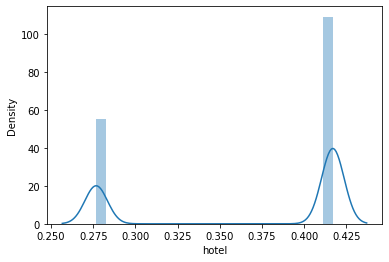

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



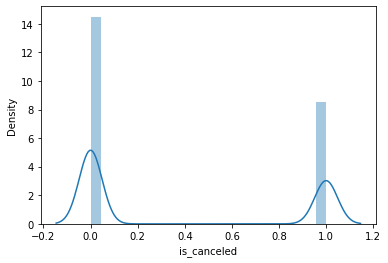

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



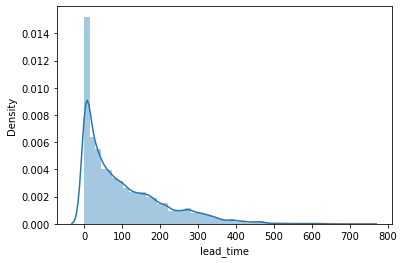

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



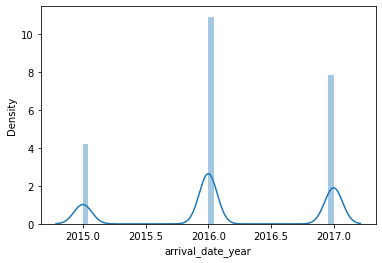

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



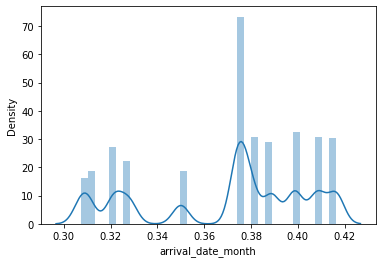

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



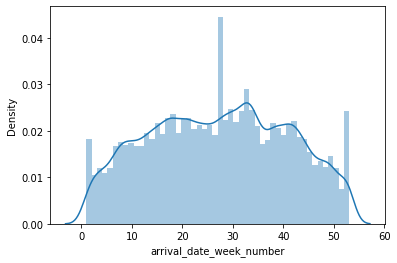

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



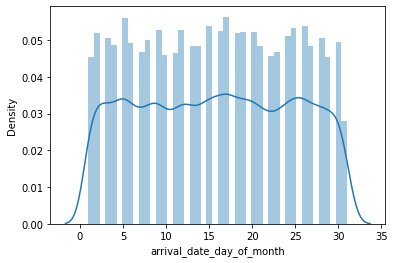

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



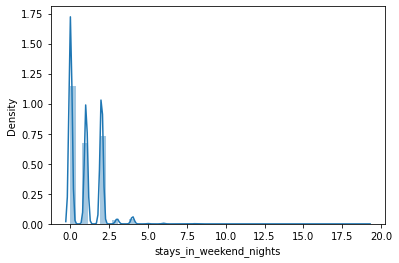

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



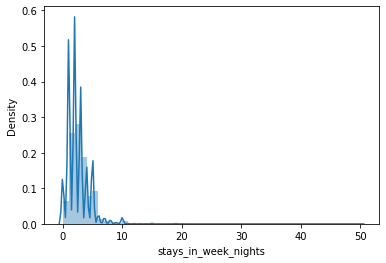

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



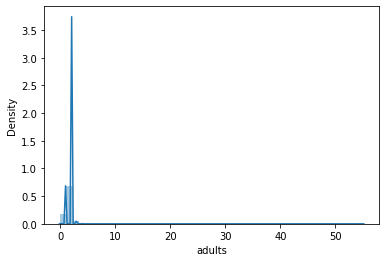

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



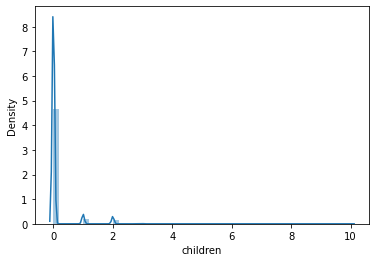

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



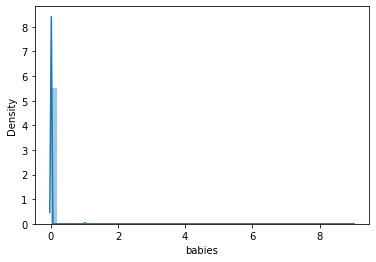

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



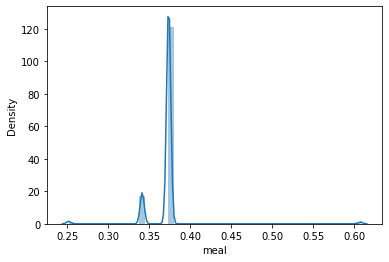

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



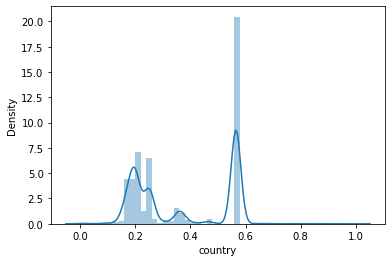

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



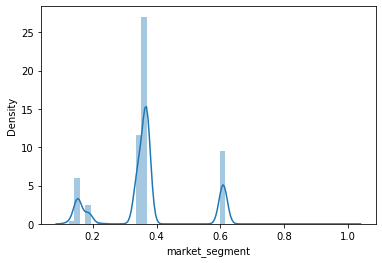

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



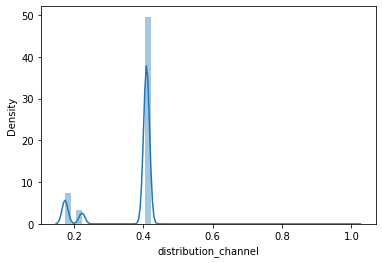

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



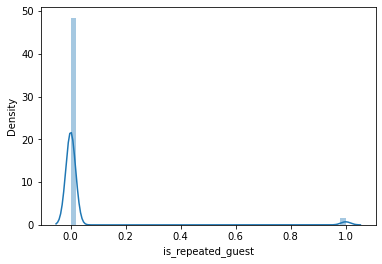

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



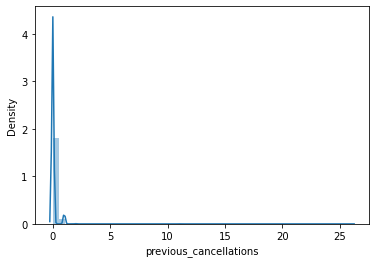

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



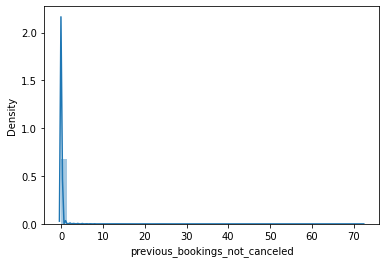

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



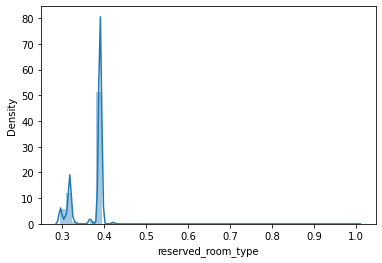

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



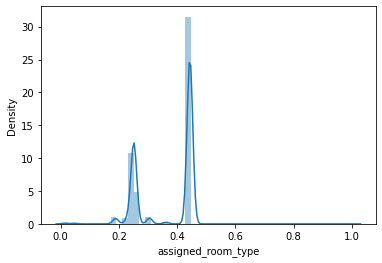

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



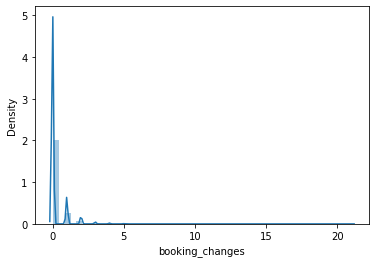

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



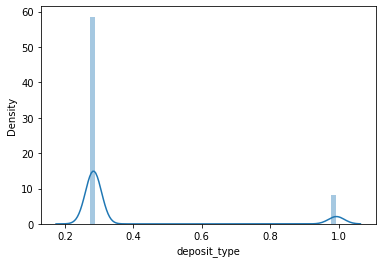

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



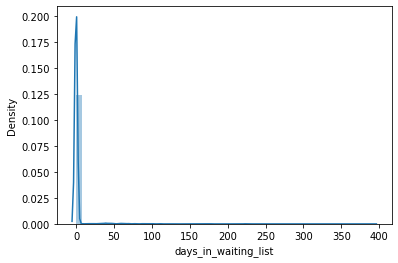

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



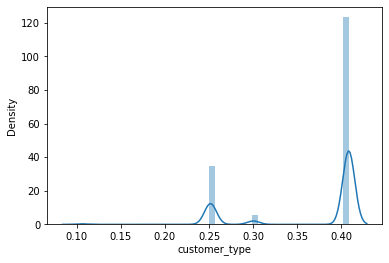

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



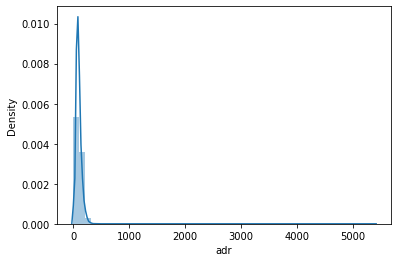

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



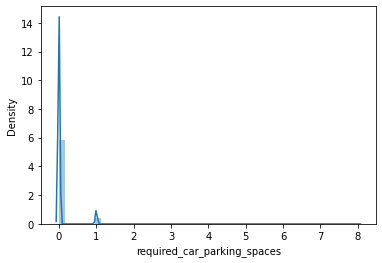

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



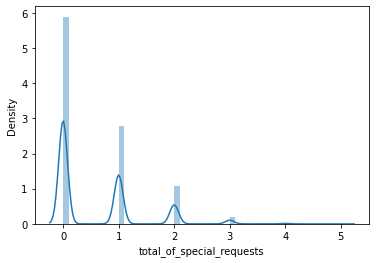

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



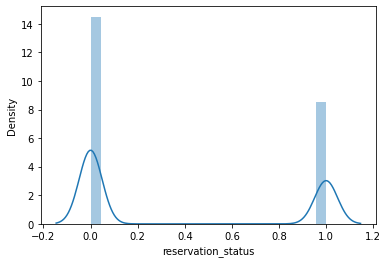

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



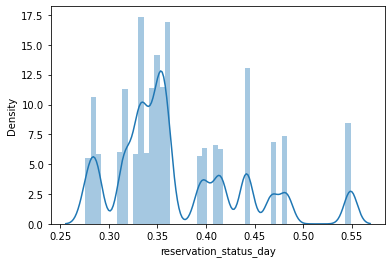

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



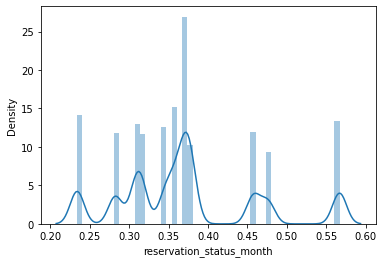

/opt/anaconda3/envs/xgboost/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



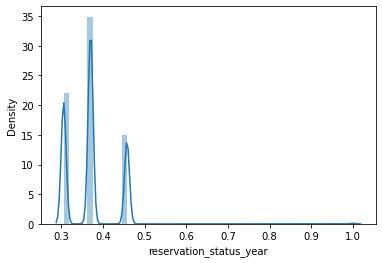

In [75]:
for col in rest_columns_final:
    sns.distplot(df_rest[col])
    plt.show()

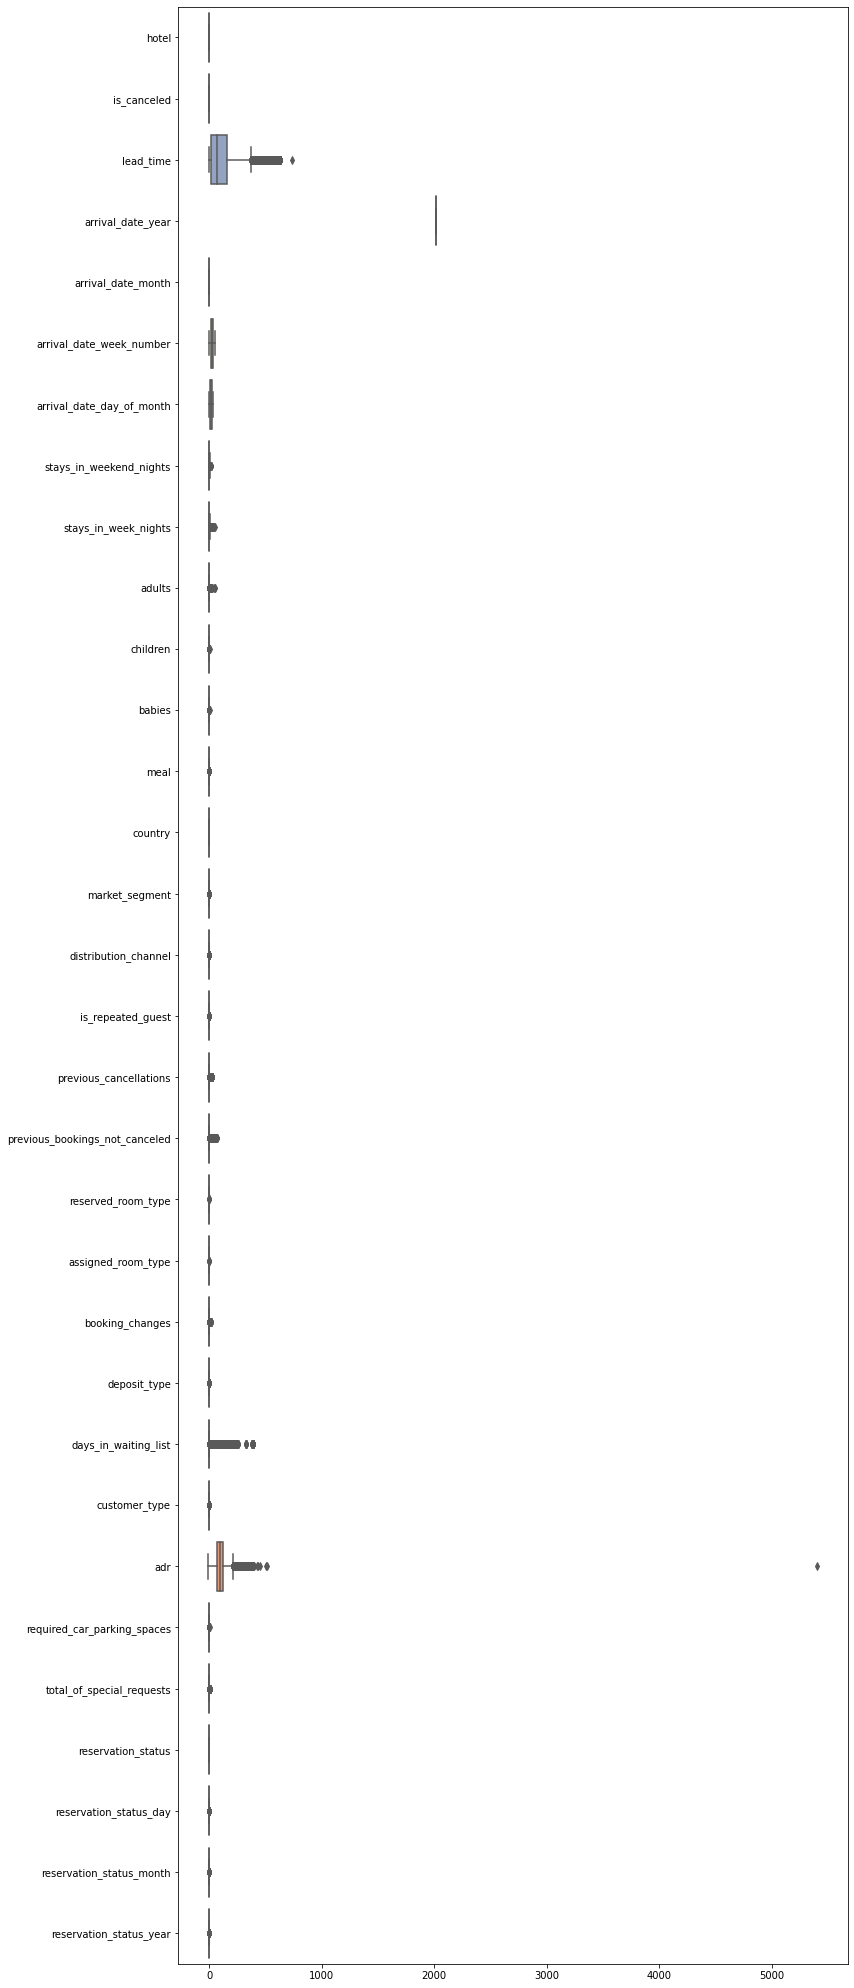

In [76]:
plt.figure(figsize=(12,36))
sns.boxplot(data=df_rest, orient='h',palette='Set2')
plt.show()

In [78]:
df_rest.shape

(95512, 32)

In [79]:
df_rest

hotel  is_canceled  lead_time  arrival_date_year  \
0       0.276721            0        342               2015   
1       0.276721            0        737               2015   
2       0.276721            0          7               2015   
3       0.276721            0         13               2015   
4       0.276721            0         14               2015   
...          ...          ...        ...                ...   
119384  0.416953            0         21               2017   
119385  0.416953            0         23               2017   
119386  0.416953            0        102               2017   
119388  0.416953            0        109               2017   
119389  0.416953            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
0                 0.374122                        27   
1                 0.374122                        27   
2                 0.374122                        27   
3                 0.374122                        27   
4                 0.374122                        27   
...                    ...                       ...   
119384            0.375450                        35   
119385            0.375450                        35   
119386            0.375450                        35   
119388            0.375450                        35   
119389            0.375450                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119384                         30                        2   
119385                         30                        2   
119386                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  days_in_waiting_list  \
0                          0       2  ...      0.283596                     0   
1                          0       2  ...      0.283596                     0   
2                          1       1  ...      0.283596                     0   
3                          1       1  ...      0.283596                     0   
4                          2       2  ...      0.283596                     0   
...                      ...     ...  ...           ...                   ...   
119384                     5       2  ...      0.283596                     0   
119385                     5       2  ...      0.283596                     0   
119386                     5       3  ...      0.283596                     0   
119388                     5       2  ...      0.283596                     0   
119389                     7       2  ...      0.283596                     0   

        customer_type     adr  required_car_parking_spaces  \
0            0.408215    0.00                            0   
1            0.408215    0.00                            0   
2            0.408215   75.00                            0   
3            0.408215   75.00                            0   
4            0.408215   98.00                            0   
...               ...     ...                          ...   
119384       0.408215   96.14                            0   
119385       0.408215   96.14                            0   
119386       0.408215  225.43                            0   
119388       0.408215  104.40                            0   
119389       0.408215  151.20                            0   

        total_of_special_requests  reservation_status  reservation_status_day  \
0                               0    

In [80]:
from leak_detect import detect_vertical_leakage, detect_horizontal_leakage

# Sampling out a separate data for final evaluation

In [81]:
#df_test = df.sample(frac=0.2)

In [82]:
#df_rest = df.drop(df_test.index)

In [83]:
#df_test.shape

In [84]:
#df_rest.shape

In [85]:
y=df_rest['is_canceled']

In [86]:
X=df_rest.drop(['is_canceled'],axis=1)

In [87]:
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_day',
       'reservation_status_month', 'reservation_status_year'],
      dtype='object')

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=123)

In [91]:
from xgboost import XGBClassifier

## Data leakage suspected

In [92]:
df_rest.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_day',
       'reservation_status_month', 'reservation_status_year'],
      dtype='object')

In [93]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

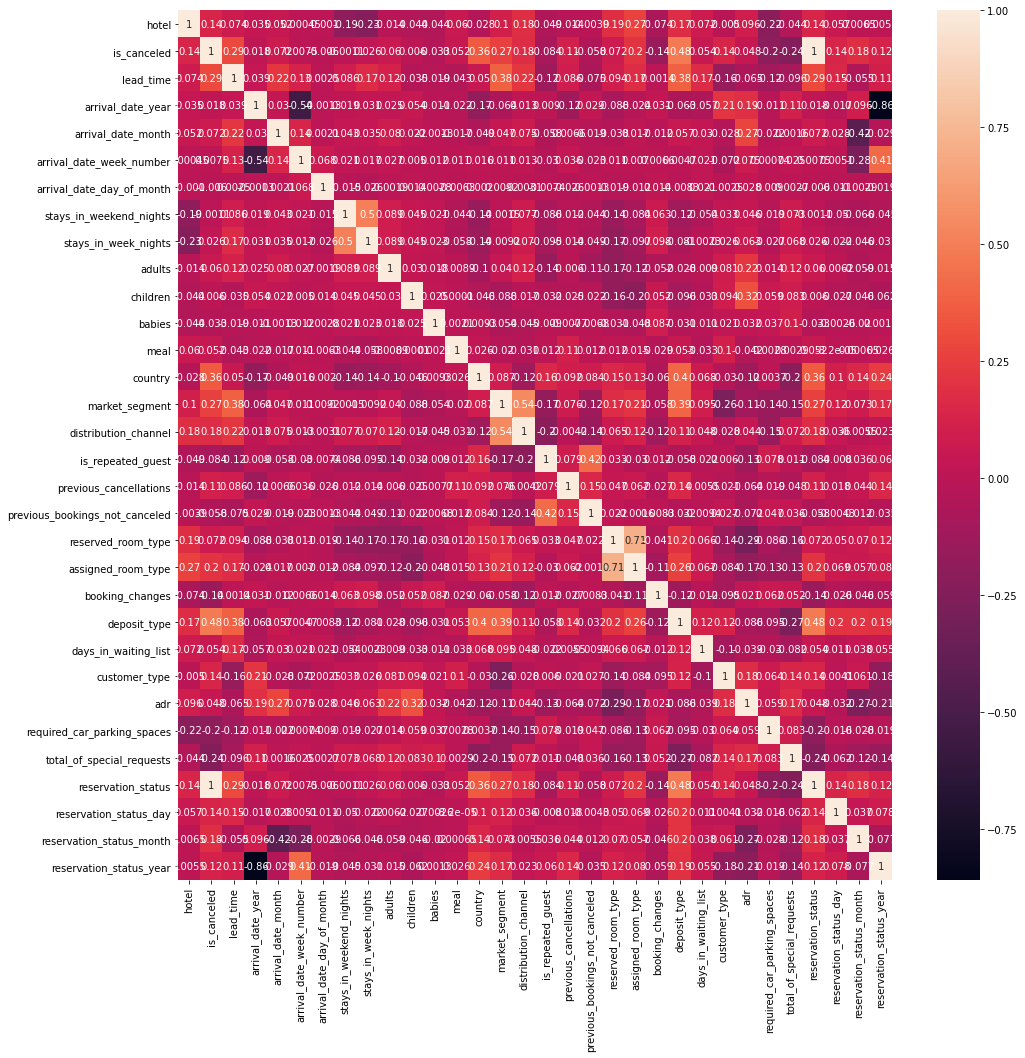

In [94]:
plt.figure(figsize=(16,16))
sns.heatmap(df_rest.corr(), annot=True)
plt.show()

<b> The input feature 'reservation_status' has correlation 1.0 with the target variable 'is-canceled'. Which implies it could be leaky variable. So, we should remove that leaky variable to fix the Data Leakage. </b>

In [95]:
probable_leaky_features = ['reservation_status']

In [96]:
X_lkfr = X.drop(probable_leaky_features, axis=1)

In [97]:
X_train_lkfr, X_valid_lkfr, y_train, y_valid = train_test_split(X_lkfr, y, test_size=0.33, random_state=123)

In [98]:
xgb_lfree = make_pipeline(XGBClassifier())

In [99]:
xgb_model_lkgfree = xgb_lfree.fit(X_train_lkfr, y_train)

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score

In [101]:
print(confusion_matrix(y_valid, xgb_model_lkgfree.predict(X_valid_lkfr)))

[[19133   746]
 [ 2912  8728]]


In [102]:
pred_prob_lkfr = xgb_model_lkgfree.predict_proba(X_valid_lkfr)

In [103]:
y_pred_lkffr = xgb_model_lkgfree.predict(X_valid_lkfr)

In [104]:
print("AUC score", roc_auc_score(y_valid, y_pred_lkffr ))

AUC score 0.8561505700553642


In [105]:
print("F1 score", f1_score(y_valid, y_pred_lkffr))

F1 score 0.82675002368097


In [106]:
print("Accuracy Score", accuracy_score(y_valid, y_pred_lkffr))

Accuracy Score 0.8839430184967797


<b> Extra Gradient Boosting classifier producing Accuracy Score 1.0. So, we should test our model on previously sampled data. </b>

In [ ]:
# Need to prepare sampled data

In [107]:
df_sample.isnull().sum()/df_sample.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.008376
babies                             0.000000
meal                               0.000000
country                            0.402044
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [108]:
df_sample.drop(['company','agent'], axis=1, inplace=True)

In [109]:
df_sample['country'].fillna("NC", inplace=True)

In [110]:
df_sample['children'].median()

0.0

In [111]:
df_sample['children'].fillna(df['children'].median(), inplace=True)

In [112]:
df_sample.isnull().sum()/df_sample.shape[0]*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

In [113]:
index_names_sample = df_sample[(df_sample['children']==0.0) & (df_sample['adults']==0.0) & (df_sample['babies']==0.0)].index

In [114]:
index_names_sample

Int64Index([ 78257,  61244, 104231,  41020,  90930,  31765,  93320,  54047,
             54037,  47180,  61249,  83506, 105106,  92962, 113188, 102157,
             47166, 107977, 101804, 102710, 105185, 114911,  50702,  96810,
             61245,  47444, 102611],
           dtype='int64')

In [115]:
df_sample.drop(index_names_sample, inplace=True)

In [116]:
df_sample['reservation_status_date']=pd.to_datetime(df_sample['reservation_status_date'])

In [117]:
df_sample['reservation_status_day'] = df_sample['reservation_status_date'].dt.day
df_sample['reservation_status_month'] = df_sample['reservation_status_date'].dt.month
df_sample['reservation_status_year'] = df_sample['reservation_status_date'].dt.year

In [118]:
df_sample.drop(['reservation_status_date','reservation_status'],axis=1, inplace=True)

In [119]:
df_sample.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [120]:
cat_col_sample = list(df_sample.select_dtypes(include=['object']).columns)

In [121]:
cat_col_sample

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [122]:
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_day',
 'reservation_status_month',
 'reservation_status_year']

In [123]:
cat_col_sample.append('reservation_status_day')

In [124]:
cat_col_sample.append('reservation_status_month')

In [125]:
cat_col_sample.append('reservation_status_year')

In [126]:
for col in cat_col_sample:
    print(df_sample.groupby([col])['is_canceled'].mean().to_dict())
    print('\n')

{'City Hotel': 0.41884387227060454, 'Resort Hotel': 0.2813241723922548}


{'April': 0.40626418520199725, 'August': 0.38620689655172413, 'December': 0.3475975975975976, 'February': 0.3588342440801457, 'January': 0.29605263157894735, 'July': 0.37583366025892506, 'June': 0.40802213001383125, 'March': 0.32146596858638743, 'May': 0.38832054560954815, 'November': 0.32056005895357403, 'October': 0.38235294117647056, 'September': 0.4030636668262326}


{'BB': 0.3751483119404595, 'FB': 0.5662650602409639, 'HB': 0.35880514067384506, 'SC': 0.3724035608308605, 'Undefined': 0.2190082644628099}


{'ABW': 0.0, 'AGO': 0.5384615384615384, 'AIA': 0.0, 'ALB': 0.0, 'AND': 1.0, 'ARE': 0.75, 'ARG': 0.22727272727272727, 'ARM': 0.0, 'ATF': 0.0, 'AUS': 0.21176470588235294, 'AUT': 0.19215686274509805, 'AZE': 0.2, 'BEL': 0.20967741935483872, 'BEN': 1.0, 'BGD': 1.0, 'BGR': 0.21428571428571427, 'BHR': 0.0, 'BIH': 0.0, 'BLR': 0.4, 'BRA': 0.39953271028037385, 'BRB': 0.0, 'CAF': 0.0, 'CHE': 0.25073746312684364, 'CHL':

In [127]:
for col in cat_col_sample:
    dict=df_sample.groupby([col])['is_canceled'].mean().to_dict()
    df_sample[col]=df_sample[col].map(dict)

In [128]:
df_sample

hotel  is_canceled  lead_time  arrival_date_year  \
108391  0.418844            0        130               2017   
68066   0.418844            1        128               2017   
18367   0.281324            0          0               2015   
111429  0.418844            0         96               2017   
7763    0.281324            1         52               2016   
...          ...          ...        ...                ...   
22741   0.281324            0         77               2017   
2019    0.281324            1         81               2015   
48190   0.418844            1         91               2016   
22248   0.281324            0         11               2016   
40483   0.418844            1         27               2015   

        arrival_date_month  arrival_date_week_number  \
108391            0.321466                        12   
68066             0.388321                        19   
18367             0.320560                        47   
111429            0.388321                        19   
7763              0.386207                        35   
...                    ...                       ...   
22741             0.321466                        13   
2019              0.403064                        40   
48190             0.321466                        12   
22248             0.321466                        11   
40483             0.375834                        31   

        arrival_date_day_of_month  stays_in_weekend_nights  \
108391                         23                        0   
68066                          12                        0   
18367                          17                        0   
111429                          9                        0   
7763                           25                        0   
...                           ...                      ...   
22741                          31                        1   
2019                           27                        2   
48190                          18                        0   
22248                          12                        4   
40483                          27                        1   

        stays_in_week_nights  adults  ...  booking_changes  deposit_type  \
108391                     3       2  ...                0      0.284550   
68066                      2       2  ...                0      0.284550   
18367                      1       1  ...                0      0.284550   
111429                     2       2  ...                0      0.284550   
7763                       2       2  ...                0      0.284550   
...                      ...     ...  ...              ...           ...   
22741                      2       2  ...                1      0.284550   
2019                       5       2  ...                0      0.284550   
48190                      2       1  ...                0      0.993939   
22248                      6       2  ...                0      0.284550   
40483                      1       2  ...                0      0.993939   

        days_in_waiting_list  customer_type     adr  \
108391                     0       0.404644   79.20   
68066                      0       0.404644  126.00   
18367                      0       0.404644   35.00   
111429                     0       0.404644  108.00   
7763                       0       0.404644  157.08   
...                      ...            ...     ...   
22741                      0       0.404644   83.47   
2019                       0       0.404644   66.29   
48190                     20       0.404644   75.00   
22248                      0       0.404644   27.90   
40483                      0       0.265510   62.00   

        required_car_parking_spaces  total_of_special_requests  \
108391                            0                          2   
68066                             0                          1   
18367                             0                          0  

In [129]:
sample_col_final = list(df_sample.columns)

In [130]:
rest_columns_final

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_day',
 'reservation_status_month',
 'reservation_status_year']

In [131]:
sample_col_final

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_day',
 'reservation_status_month',
 'reservation_status_year']

In [132]:
y_test_sample = df_sample['is_canceled']

In [133]:
X_test_sample = df_sample.drop(['is_canceled'], axis=1)

In [134]:
print(accuracy_score(y_test_sample, xgb_model_lkgfree.predict(X_test_sample)))

0.868517043310553


In [135]:
print("F1 score on test set:", f1_score(y_test_sample, xgb_model_lkgfree.predict(X_test_sample)))

F1 score on test set: 0.8102843315184514


In [136]:
from sklearn.metrics import classification_report

In [137]:
print("Classification Report:",classification_report(y_test_sample, xgb_model_lkgfree.predict(X_test_sample)))

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90     14962
           1       0.88      0.75      0.81      8889

    accuracy                           0.87     23851
   macro avg       0.87      0.85      0.85     23851
weighted avg       0.87      0.87      0.87     23851



In [138]:
pred_prob_sample = xgb_model_lkgfree.predict_proba(X_test_sample)

In [140]:
fpr, tpr, thrshld = roc_curve(y_test_sample, pred_prob_sample[:,1])

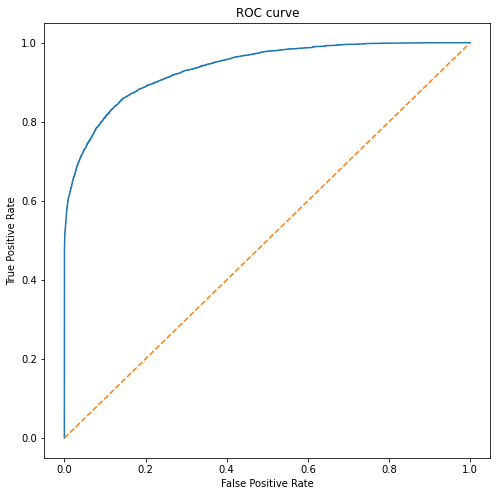

In [141]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.plot([0,1], ls ='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

In [142]:
print('AUC score on the test set:', roc_auc_score(y_test_sample, pred_prob_sample[:,1]))

AUC score on the test set: 0.9365805343386957
